## Proyecto Final
### Hugo Villanueva
#### Ciencia de Datos en Python
#### Postgrado en análisis y predicción de datos

In [582]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Separación de datos

In [583]:
main_data = np.load('proyecto_training_data.npy')

In [584]:
np.shape(main_data)#hallar la dimensión de la matriz

(1460, 6)

In [585]:
rownum = int(np.shape(main_data)[0]*0.8)# para hallar el número de filas para las varibles de entrenamiento


In [586]:
training_data = main_data[0:rownum] # Variables entrenamiento
test_data = main_data[rownum:] # Variables prueba

### Análisis exploratorio

In [587]:
caracteristicas = ['y:Precio de venta', 'x_1:Calidad', 'x_2:Área primer piso', 'x_3:Total de cuartos', 'x_4:Año de construcción', 'x_5:Largo Fachada']

In [588]:
for lon in range(6):
    print('Media',caracteristicas[lon],'=',np.nanmean(training_data[:,lon]))
    print('Valor Máximo',caracteristicas[lon],'=',np.nanmax(training_data[:,lon]))
    print('Valor Minimo',caracteristicas[lon],'=',np.nanmin(training_data[:,lon]))
    print('Rango',caracteristicas[lon],'=',(np.nanmax(training_data[:,lon])-np.nanmin(training_data[:,lon])))
    print('Desviación estandar',caracteristicas[lon],'=',np.nanstd(training_data[:,lon]),'\n')
    
    

Media y:Precio de venta = 180590.27739726027
Valor Máximo y:Precio de venta = 755000.0
Valor Minimo y:Precio de venta = 34900.0
Rango y:Precio de venta = 720100.0
Desviación estandar y:Precio de venta = 78781.95108033362 

Media x_1:Calidad = 6.101027397260274
Valor Máximo x_1:Calidad = 10.0
Valor Minimo x_1:Calidad = 1.0
Rango x_1:Calidad = 9.0
Desviación estandar x_1:Calidad = 1.377435193240741 

Media x_2:Área primer piso = 1156.3236301369864
Valor Máximo x_2:Área primer piso = 3228.0
Valor Minimo x_2:Área primer piso = 334.0
Rango x_2:Área primer piso = 2894.0
Desviación estandar x_2:Área primer piso = 373.620331503586 

Media x_3:Total de cuartos = 6.4854452054794525
Valor Máximo x_3:Total de cuartos = 14.0
Valor Minimo x_3:Total de cuartos = 2.0
Rango x_3:Total de cuartos = 12.0
Desviación estandar x_3:Total de cuartos = 1.6084517167387253 

Media x_4:Año de construcción = 1971.451198630137
Valor Máximo x_4:Año de construcción = 2010.0
Valor Minimo x_4:Año de construcción = 1875.

### Histogramas

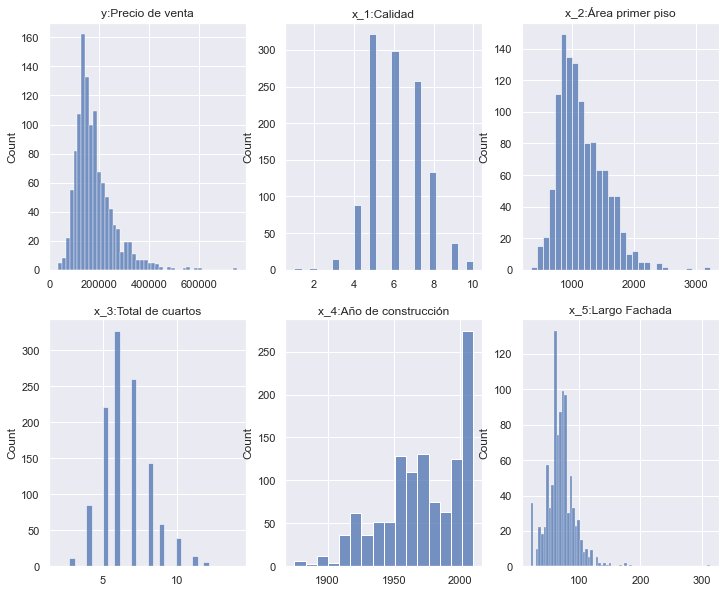

In [589]:
fig = plt.figure(figsize=(12, 10))
sns.set()
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.title(caracteristicas[i-1])
    sns.histplot(training_data[:,i-1])




### Correlación entre catecterísticas y precios de venta

In [590]:
x_training_data = training_data[:,1:]
y_training_data = training_data[:rownum+1,0]
x_test_data = test_data[:,1:]
y_test_data = test_data[:rownum+1,0]
y_test_data.shape
# separando variables independientes de las dependientes, se agrego dimensinalidad en las filas de y training
#debido a que para calcular el coeficiente de correlación se debe tener la misma dimensión

(292,)

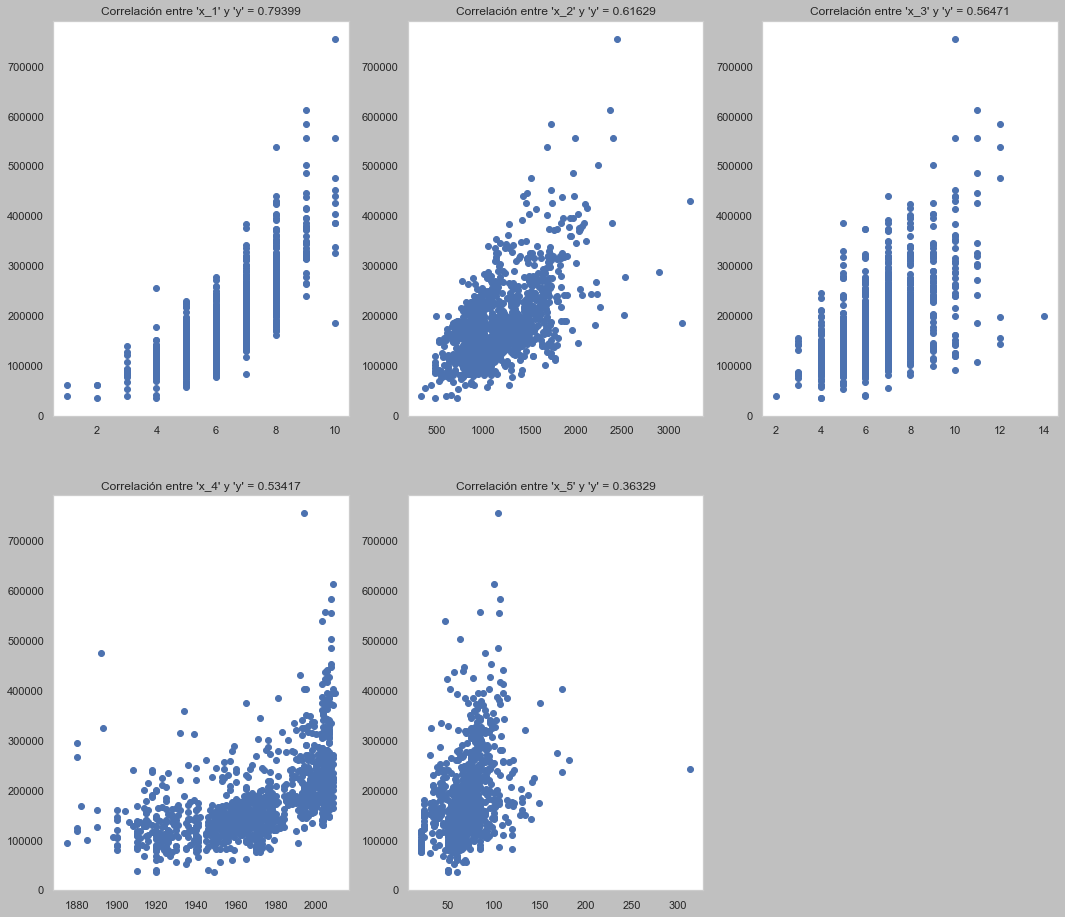

In [591]:
fig = plt.figure(figsize=(18, 16),facecolor='silver')
sns.set_style("whitegrid", {'axes.grid' : False})
for i in range(1,6):
    ign = np.isnan(x_training_data[:,i-1])
    corre = np.corrcoef(x_training_data[~ign,i-1],y_training_data[~ign])[1,0]
    plt.subplot(2,3,i)
    plt.title("Correlación entre 'x_%i' y 'y' = %0.5f"%(i,corre))
    plt.scatter(x_training_data[~ign,i-1],y_training_data[~ign])#la característica 5 tiene ciertos datos no numéricos, es por ello que se necesita quitarlos

Las dos variables independientes $x_1$ y $x_2$, son las que tienen una correlación alta. Estas corresponden a su vez a las variables de calidad y área del primer nivel respectivamente, es así que se trabajará con estas variables en el futuro para realizar los modelos lineales.

### Función de entrenamiento de modelos.

In [592]:
def trainlinearmodel(x,y,epochs,imprimir_error_cada,lr):
    x_extend = np.hstack((x,u))
    parameters = np.expand_dims(np.array([0,0]),1)
    iterations = {}
    error_iterations = np.array([])
    for i in range(epochs):
        y_hat = np.matmul(x_extend,parameters)
        error = 1/2*(np.mean((y-y_hat)**2))
        error_iterations = np.append(error_iterations,error)
        gradient = np.expand_dims(np.mean((y_hat-y)*x_extend,axis=0),1)
        parameters = parameters-(lr*gradient)
        iterations[i+1] = parameters
        if i % imprimir_error_cada ==0:
            print("Iteración%i"%(i+1),"Error=%0.2f"%error_iterations[i])
    return iterations,error_iterations


### Funciones graficadoras

In [593]:
def error_change(error_iterations):
    plt.plot(error_iterations)
    plt.xlabel("Número de iteraciones")
    plt.ylabel("Error")
    

In [594]:
def evolution(iterations,n,x):
    fig = plt.figure(figsize=(16,10))
    plt.scatter(x,y)
    model = max(list(iterations.keys()))
    for i in range(0,model,n):
        y_hat = iterations[i+1][0] * x + iterations[i+1][1]
        plt.plot(x,y_hat)
        
    

### Entrenando los modelos

### Modelo para $x_1$

In [595]:
x_1 = np.expand_dims(x_training_data[:,0],1)
x_2 = np.expand_dims(x_training_data[:,1],1)
u = np.expand_dims(np.ones_like(x_training_data[:,0]),1) 
y = np.expand_dims(y_training_data,1)

In [596]:
xx,yy = trainlinearmodel(x_1,y,30000,3000,0.00001)

Iteración1 Error=19409722053.22
Iteración3001 Error=3020465576.14
Iteración6001 Error=1540196221.69
Iteración9001 Error=1405920805.26
Iteración12001 Error=1393164317.20
Iteración15001 Error=1391380428.10
Iteración18001 Error=1390588945.19
Iteración21001 Error=1389888845.72
Iteración24001 Error=1389198779.74
Iteración27001 Error=1388511397.87


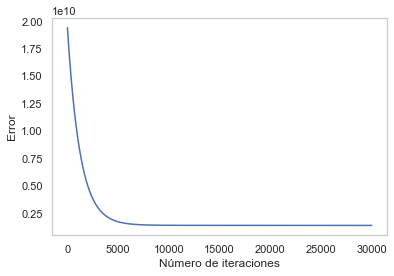

In [597]:
error_change(yy)

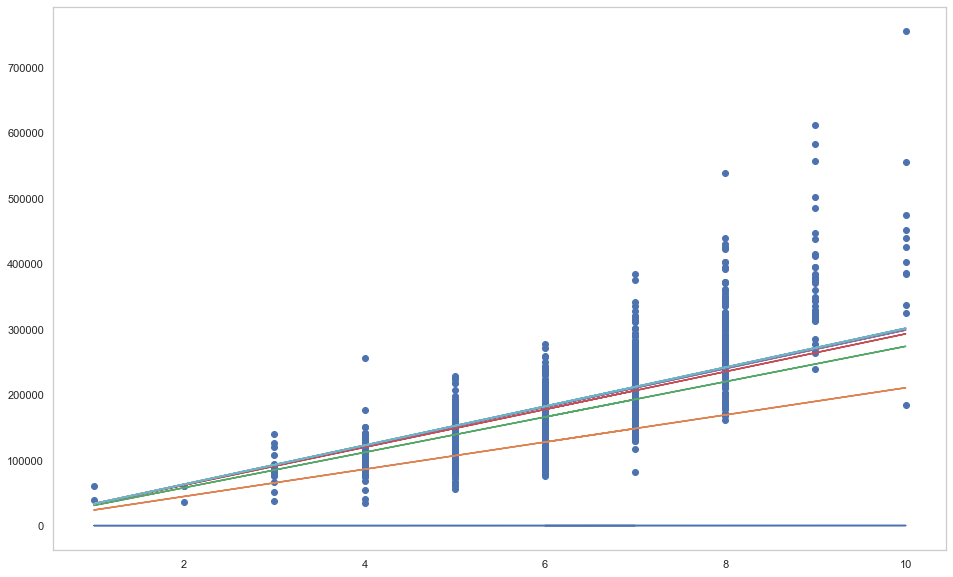

In [598]:
evolution(xx,3000,x_1)

### Modelo para $x_2$

In [599]:
xx_2,yy = trainlinearmodel(x_2,y,5000, 500, 0.000000002)

Iteración1 Error=19409722053.22
Iteración501 Error=2873958314.31
Iteración1001 Error=2015140959.29
Iteración1501 Error=1970536586.43
Iteración2001 Error=1968219962.98
Iteración2501 Error=1968099636.80
Iteración3001 Error=1968093379.63
Iteración3501 Error=1968093046.87
Iteración4001 Error=1968093021.79
Iteración4501 Error=1968093012.70


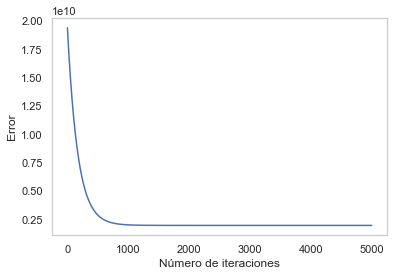

In [600]:
error_change(yy)

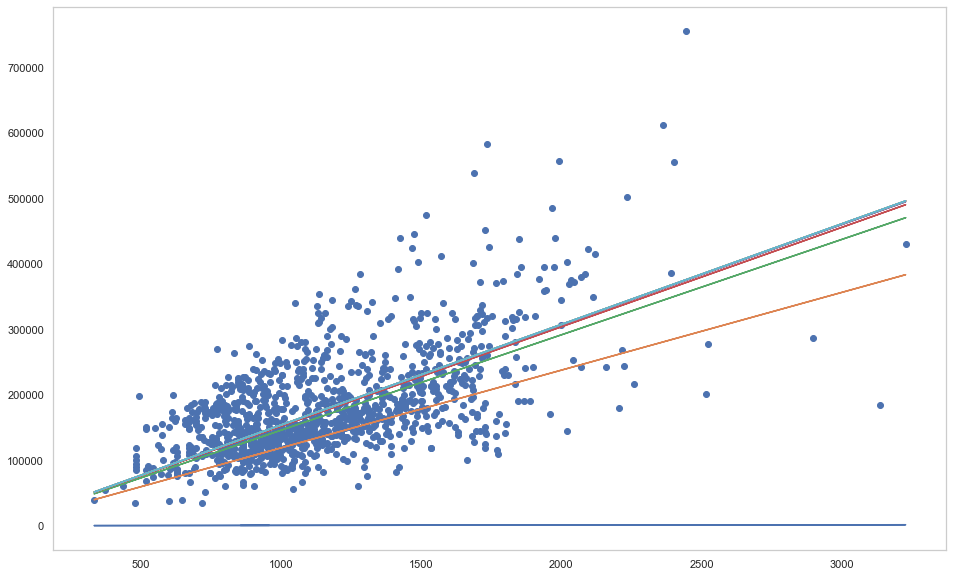

In [601]:
evolution(xx_2,500,x_2)

### Uso de Scikit-Learn para creación de modelos

### Modelo Scikit para $x_1$

In [602]:
reglinx_1 = LinearRegression().fit(x_1,y)
reglinx_1.coef_, reglinx_1.intercept_

(array([[45411.99877916]]), array([-96469.57131874]))

### Modelo Scikit para $x_2$

In [603]:
reglinx_2 = LinearRegression().fit(x_2,y)
reglinx_2.coef_, reglinx_2.intercept_

(array([[129.95124229]]), array([30324.58517496]))

In [604]:
def prediction(iterations,reglinx,x):
    model = max(list(iterations.keys()))
    y_hat_i = np.array(iterations[model][0] * x + iterations[model][1])
    regliny_hat = reglinx.predict(x)
    y_hat_avg = (y_hat_i+regliny_hat)/2
    
    return y_hat_i, regliny_hat, y_hat_avg 

In [605]:
t_1 = np.expand_dims(x_test_data[:,0],1)
t_2 = np.expand_dims(x_test_data[:,1],1)
yt = np.expand_dims(y_test_data,1)

In [606]:
y_hat_i_x_1,regliny_hat_x_1,y_hat_avg_x_1 = prediction(xx,reglinx_1,t_1)
y_hat_i_x_2,regliny_hat_x_2,y_hat_avg_x_2 = prediction(xx_2,reglinx_2,t_2)

### Calculando error de los datos de prueba

In [607]:
def errortestdata(yit,yreg,yr):
    erroryit = 1/2*(np.mean((yit-yt)**2))
    erroryreg = 1/2*(np.mean((yreg-yt)**2))
    
    return erroryit,erroryreg
    
    
    

In [608]:
error_model_x1i,error_model_x1r = errortestdata(y_hat_i_x_1,regliny_hat_x_1,yt)
error_model_x2i,error_model_x2r = errortestdata(y_hat_i_x_2,regliny_hat_x_2,yt)

### Graficando errores

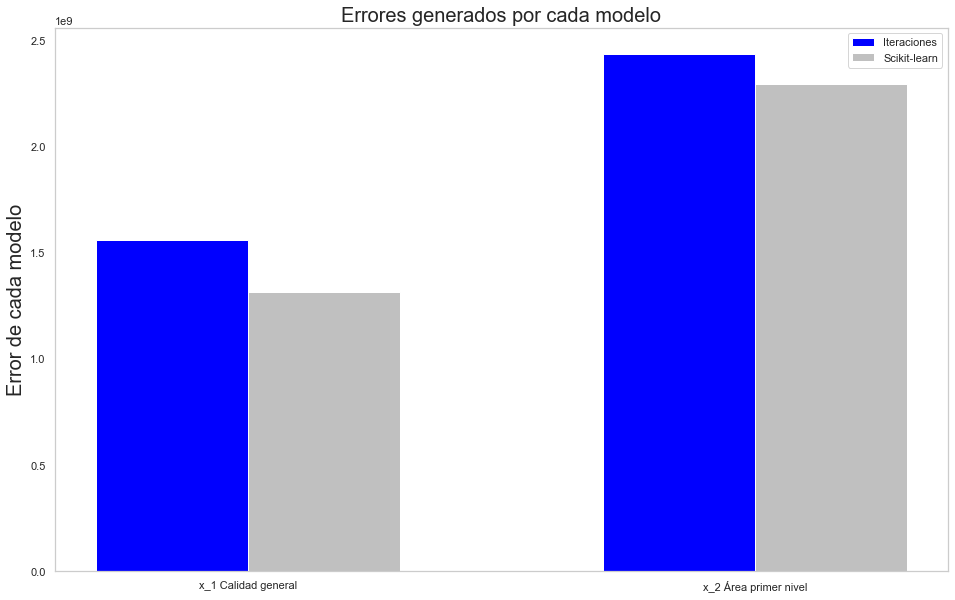

In [609]:
labels = ['x_1 Calidad general','x_2 Área primer nivel']
error_iterations = [error_model_x1i,error_model_x2i]
error_reg = [error_model_x1r,error_model_x2r]
sns.set_style("whitegrid", {'axes.grid' : False})
loc = np.arange(len(labels))  
width = 0.3
fig, ax = plt.subplots(figsize=(16, 10))
labmod1 = ax.bar(loc - width/2, error_iterations, width, label='Iteraciones',color="blue")
labmod2 = ax.bar(loc + width/2, error_reg, width, label='Scikit-learn',color="silver")

ax.set_ylabel('Error de cada modelo',size=20)
ax.set_title('Errores generados por cada modelo',size=20)
ax.set_xticks(loc)
ax.set_xticklabels(labels)

ax.legend()








Se puede concluir que el modelo $x_1$ para "calidad general de casa" sería el mejor modelo para utilizar en la predicción del costo de las casas, debido a que en el análisis de contraste de errores, en ambas modalidades mostró errores más pequeños respecto a la variable $x_2$. También se puede concluir que bajo el entrenamiento de optimización de parámetros y scikit-learn, hay poca diferencia respecto a los errores de cada forma de entrenamiento. Por último es válido notar que realizar la predicción con scikit-learn es más óptimo para predecir el modelo $x_1$